In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_0 = -10
x_1 = 10
dx = 0.01

x = np.arange(x_0, x_1, dx)

N = len(x)
indicator = np.where(np.fft.fftfreq(N) >= 0, 1, 0)

t = 0
T = 10
dt = 0.01

t = np.arange(0, T, dt)

In [3]:
u_0 = np.sqrt(2)/(x - 1j)

In [4]:
def timestep(u, dt, dx):
    u_xx = second_derivative(u)
    nonlinearity = pi_plus(first_derivative(np.abs(u)**2)) * u
    return 1j * u_xx + 2 * nonlinearity

In [5]:
def first_derivative(u):
    return np.gradient(u)

def second_derivative(u):
    return np.gradient(np.gradient(u))

def pi_plus(u):
    return np.fft.ifft(indicator * np.fft.fft(u))

In [6]:
u = np.empty(shape=(len(t), len(x)), dtype=complex)
u[0] = u_0
for i in range(len(t)-1):
    u[i+1] = timestep(u[i], dt, dx)

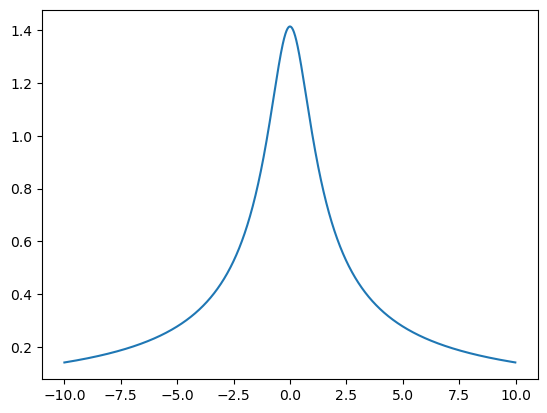

In [8]:
plt.plot(x, np.abs(u[0]))
plt.show()